In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier



In [2]:
df = pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [5]:
df["age_years"] = (df["age"]/365).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [6]:
df2 = df.drop(["age"],axis=1)

<Axes: >

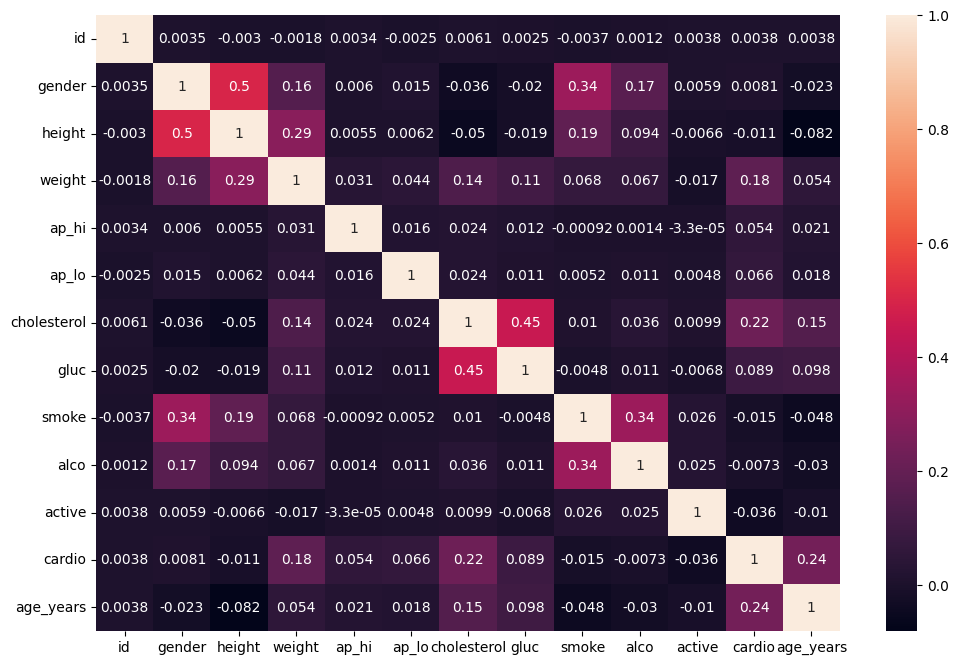

In [7]:
plt.figure(figsize=(12,8))

sns.heatmap(df2.corr(),annot=True)

In [8]:
df2

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61


In [9]:
#Distribucion target

distribucion = df2["cardio"].value_counts()
porcentaje = (df2["cardio"].value_counts()/len(df2))*100

print(distribucion,porcentaje)

cardio
0    35021
1    34979
Name: count, dtype: int64 cardio
0    50.03
1    49.97
Name: count, dtype: float64


In [10]:
pd.set_option("display.max_rows", 999)
df2["ap_lo"].value_counts()
df2["ap_hi"].value_counts()
df2["weight"].value_counts()
df_clean = df2[
    (df2["ap_hi"] >= 40) & (df2["ap_hi"] <= 250) &
    (df2["ap_lo"] >= 40) & (df2["ap_lo"] <= 180) &
    (df2["ap_hi"] >= df2["ap_lo"])
]

df_clean

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61


In [11]:
df_clean.loc[:, "imc"] = df_clean["weight"] / ((df_clean["height"] / 100) ** 2)
df_clean

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14764\2261036624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, "imc"] = df_clean["weight"] / ((df_clean["height"] / 100) ** 2)


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,imc
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [12]:
df3 =df_clean.drop("id",axis=1)

<Axes: >

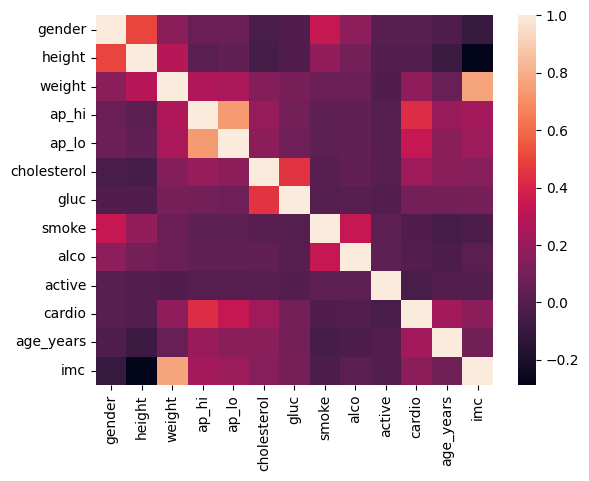

In [13]:
sns.heatmap(df3.corr())

In [14]:
df3.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,imc
count,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000,68673.000000
mean,1.348638,164.361073,74.119093,126.672346,81.306452,1.364641,1.225707,0.087968,0.053354,0.803343,0.494707,52.828826,27.521841
std,0.476543,8.183758,14.332889,16.693262,9.447467,0.678886,0.571582,0.283250,0.224741,0.397473,0.499976,6.769432,6.052017
min,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.119376
max,2.000000,250.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [15]:
# Entrenar modelo

X = df3.drop("cardio",axis=1)
y = df3["cardio"]

X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [20]:
# Logistic regression 

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # Puedes usar 'l1' si cambias el solver
    'solver': ['liblinear', 'lbfgs']
}

# Métricas múltiples
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Modelo base
logreg = LogisticRegression(max_iter=1000)

# GridSearchCV
grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    scoring=scoring,
                    refit='recall', 
                    cv=5,
                    n_jobs=-1,
                    verbose=1)

# Ajustar modelo (usa X_train_scaled si ya está escalado)
grid.fit(X_train_scaled, y_train)

# Predecir
y_pred = grid.predict(X_test_scaled)
y_prob = grid.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Mejores parámetros:", grid.best_params_)
# Métricas finales en test
print("\nMétricas en test:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Métricas en test:
Accuracy: 0.7294503094284674
Precision: 0.7545241286863271
Recall: 0.6667160201362156
F1 Score: 0.7079075617041346
ROC AUC: 0.795270323608176

Matriz de Confusión:
[[5516 1465]
 [2251 4503]]


In [1]:

from sklearn.ensemble import RandomForestClassifier

# Parámetros para GridSearch
parameters = {
    'n_estimators': [100, 200, 50],
    'max_features': [3, 5, 7],
    'random_state': [1, 2, 3]
}

# Definir modelo base
rfc = RandomForestClassifier()

# Métricas múltiples
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Validación cruzada
clf2 = GridSearchCV(estimator=rfc,
                    param_grid=parameters,
                    scoring=scoring,
                    refit='recall',  
                    cv=KFold(n_splits=10, shuffle=True, random_state=42),
                    n_jobs=-1,
                    verbose=1)

# Entrenar con GridSearchCV
clf2.fit(X_train_scaled, y_train)

# Predecir con el mejor modelo encontrado
best_model = clf2.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Mostrar mejores hiperparámetros
print("Mejores parámetros:", clf2.best_params_)

# Métricas finales en test
print("\nMétricas en test:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


NameError: name 'GridSearchCV' is not defined

In [2]:
# Modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Métricas de evaluación
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',       
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# GridSearchCV con recall como métrica principal
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scoring,
    refit='recall',   
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entrenamos el modelo
grid.fit(X_train_scaled, y_train)

# Predicciones
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Resultados
print("Mejores parámetros encontrados:")
print(grid.best_params_)

print("\nMétricas en test:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred)) 
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


NameError: name 'XGBClassifier' is not defined